![image.png](https://a.thumbs.redditmedia.com/VHAsVfe-7uv-O_gcAwS9G0jE8o5r10YMadgzhf2GrK8.png)

# Roast Me Generator

A simple markov model implimented in python using [markovify](https://github.com/jsvine/markovify) and scaped reddit comments from [r/RoastMe](http://reddit.com/r/roastme).

### Tools:
- **Markovify**
    - Markov model implimentation
    - Weighted comments by number of upvotes
- **Pandas**
    - Data manipulation

In [101]:
import markovify
import pandas as pd

# Import dataset
file = pd.read_csv('comments.csv',sep='|')
df = pd.DataFrame(file)

Each row on the dataset represents one comment on a reddit post. The dataset contains 247258 different comments that were on the "top" of r/RoastMe during the spring of 2017.

In [105]:
df.head()

sub_id                                          sub_title  \
0  5nkbyc  We are hhproductions professional complainers ...   
1  5nkbyc  We are hhproductions professional complainers ...   
2  5nkbyc  We are hhproductions professional complainers ...   
3  5nkbyc  We are hhproductions professional complainers ...   
4  5nkbyc  We are hhproductions professional complainers ...   

                             img_link  comment_score  \
0  https://i.redd.it/78ckh6a43b9y.jpg              1   
1  https://i.redd.it/78ckh6a43b9y.jpg          36500   
2  https://i.redd.it/78ckh6a43b9y.jpg          16306   
3  https://i.redd.it/78ckh6a43b9y.jpg          16154   
4  https://i.redd.it/78ckh6a43b9y.jpg          13846   

                                        comment_body  blankk  
0  You are required to make a video on YouTube in...     NaN  
1  Your relationship is stable because thats wher...     NaN  
2  I turn on adblock for your videos   Edit thank...     NaN  
3  I thought roasting a couple Jews went out of s...     NaN  
4  The only reason youre posting here is for a vi...     NaN

## Markovify Dataset
Some comments were incorrectly formatted, so we just excluded them from our model. 

In [106]:
model_list = []
score_weights = []
invalid_comment_count = 0

# Iterate through dataset and add elements to a model
for i in range(0,len(df['comment_body'])):
    try:
        # Make sure the comment body is a string
        if type(df['comment_body'][i]) != 'str': 
            # Add both the comment text and scores to lists
            model_list.append(markovify.Text(df['comment_body'][i], state_size=3))
            score_weights.append(df['comment_score'][i]) 
    except:
        # If comments are invalid they will throw an exception
        invalid_comment_count += 1

print('Number of comments: ' + str(len(score_weights)))
print('Number of invalid comments: ' + str(invalid_comment_count))

Number of comments: 246599
Number of invalid comments: 659


## Add score weights to model 

In [10]:
model_combo = markovify.combine(model_list,score_weights)

## Results

In [100]:
model_combo.make_short_sentence(100)

'Gravy is not a conditioner'

**'First off cut your hair you look remarkably like John Travolta'**

**'Someone has been lying to you to spare your feelings'**

**'Gravy is not a conditioner'**

# Cool Markdown Stuff

Some of the examples came from [here](http://www.unexpected-vortices.com/sw/rippledoc/quick-markdown-example.html)

### Gifs
![gif.gif](https://media.giphy.com/media/wpBCnSSBCbh3q/giphy.gif)

### Math
$$I = \int \rho R^{2} dV$$

### Block quotes
> WOW!
>
> They can span multiple paragraphs,

### Lists
Here's a numbered list:

 1. first item
 2. second item
 3. third item

### Bullets

- Woah
- Wow
- Wowza

# Matplotlib

Graphs displayed beside code

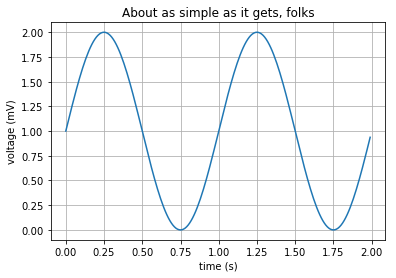

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
